# <center> <bold> AIDI 1002 Final Term Project Report </bold> </center>



#### Student Name : Jay Pravianbhai Patel(200538084)
#### Email: 200538084@student.georgianc.on.ca

#### Student Name : Ashish Pandya(200575073)
#### Email: 200575073@student.georgianc.on.ca



#### **Research Paper Link:** https://github.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks/blob/main/Paper.pdf

#### **Source Link:** https://ieeexplore.ieee.org/document/9725845

## **Problem Description:**

The project, “Financial-Data-Time-Series-Forecasting-Using-Neural-Networks”, is focused on predicting future financial data based on historical time series data using neural networks. The associated paper is currently in press at IEEE ICONAT 2022.

The problem involves forecasting financial data, a task that has significant implications for decision-making processes in the financial sector. By using neural networks, the project aims to identify complex patterns and relationships in the data, which can then be used to predict future financial trends.



## **Context of the Problem:**

The problem of forecasting financial data is of paramount importance due to its direct impact on the global economy. Accurate predictions can guide investment strategies, inform policy decisions, and help mitigate risks associated with market volatility. In an increasingly data-driven world, the ability to accurately forecast financial trends is a key competitive advantage for businesses and investors alike.

## **Limitations About Other Approaches:**

Traditional methods of financial forecasting, such as statistical and econometric models, often rely on assumptions that may not hold in real-world scenarios, such as linearity and stationarity of time series data. These models may also struggle to capture complex patterns and relationships in the data.

Machine learning approaches, while powerful, also have their limitations. They often require large amounts of data to perform well and can be prone to overfitting. Furthermore, they can act as “black boxes”, making it difficult to interpret their predictions and understand the underlying relationships in the data.

The use of neural networks in this project aims to address some of these limitations by leveraging their ability to model complex, non-linear relationships and their capacity for handling large datasets. However, it’s important to note that while neural networks can improve prediction accuracy, they also require careful tuning and validation to ensure robust performance. Additionally, interpretability remains a challenge with these models.


# Data Loading

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks/main/Code/train_new.csv/train_new.csv")

In [2]:
data.head()

,Unnamed: 0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,Cash
0,01/01/2015,40.94,53.630,159.28,110.38,65.44,90.16,38.06,45.02,89.31,...,43.290,92.45,53.27,36.5155,38.07,52.3831,113.42,28.510,43.03,0.0355
1,02/01/2015,40.56,53.910,158.56,109.33,65.89,90.46,37.31,44.90,88.84,...,43.600,92.83,51.93,36.2257,38.08,52.0236,112.59,28.290,43.31,0.0152
2,05/01/2015,39.80,53.875,156.47,106.25,64.65,89.69,37.07,44.91,87.34,...,42.795,90.29,51.57,35.4353,35.71,50.9666,116.79,27.230,43.05,0.0101
3,06/01/2015,39.18,53.040,156.36,106.26,64.33,90.18,36.13,44.40,86.71,...,42.180,89.81,50.93,34.9611,35.50,50.3410,115.80,26.190,42.63,0.0253
4,07/01/2015,39.70,53.010,159.72,107.75,66.93,91.98,37.28,44.76,88.53,...,42.195,90.72,52.25,35.4089,35.78,52.0092,118.68,26.435,43.51,0.0203


In [3]:
data.columns

Index(['Unnamed: 0', 'A ', 'AAL ', 'AAP ', 'AAPL ', 'ABBV ', 'ABC ', 'ABMD ',
       'ABT ', 'ACN ',
       ...
       'XLNX ', 'XOM ', 'XRAY ', 'XRX ', 'XYL ', 'YUM ', 'ZBH ', 'ZION ',
       'ZTS ', 'Cash'],
      dtype='object', length=507)

In [4]:
# sum of null values in the data
data.isna().sum()

Unnamed: 0    0
A             0
AAL           0
AAP           0
AAPL          0
             ..
YUM           0
ZBH           0
ZION          0
ZTS           0
Cash          0
Length: 507, dtype: int64

In [5]:
# # converting date column from object to datetime
# data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])

# Trend Analysis

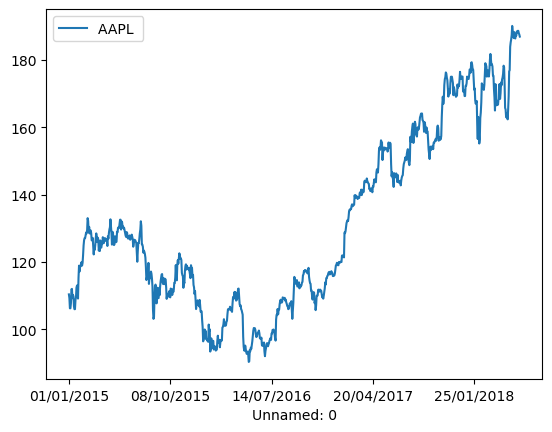

In [6]:
import matplotlib.pyplot as plt

# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

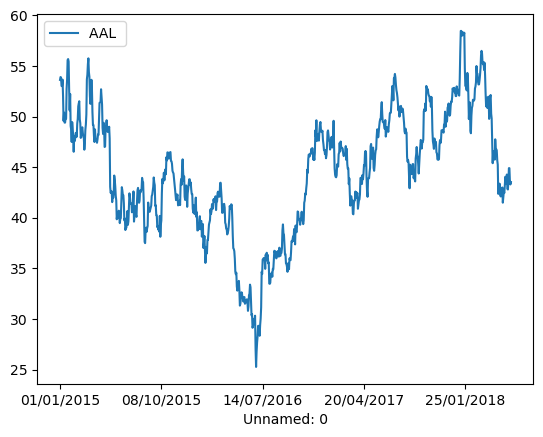

In [7]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAL ')
plt.show()

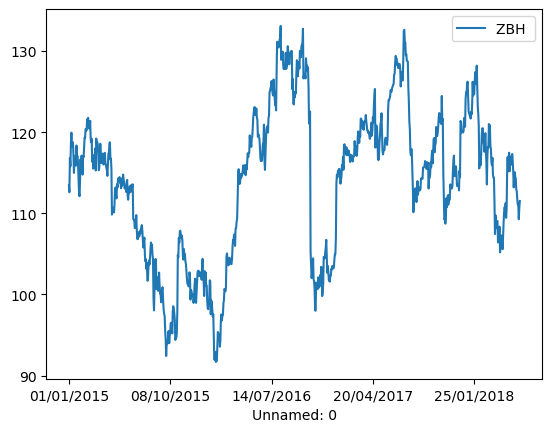

In [8]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ZBH ')
plt.show()

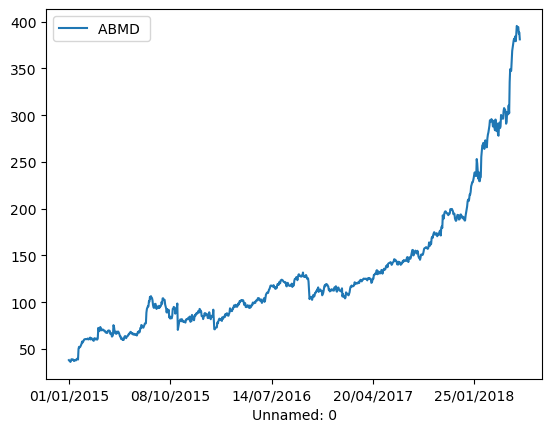

In [9]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ABMD ')
plt.show()

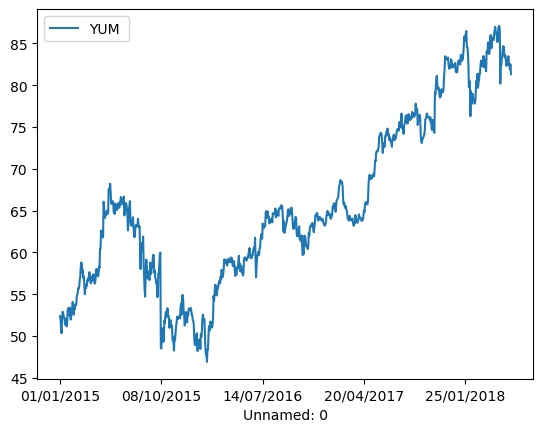

In [10]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'YUM ')
plt.show()

# Selecting stock

In [11]:
data_stock = data['AAPL ']

In [12]:
data_stock.shape

(891,)

In [13]:
891 - 178


713

In [14]:
data_stock_np = np.array(data_stock)

In [15]:
data_stock_np[-15]

188.59

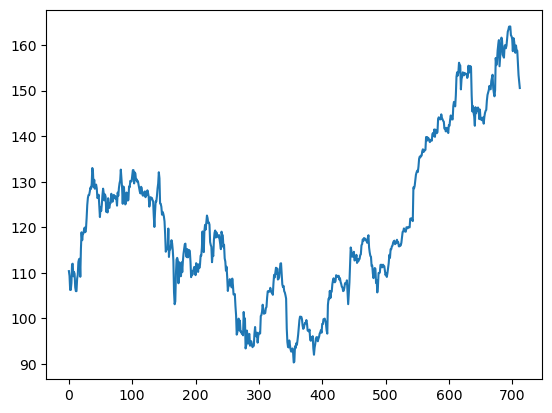

In [16]:
data_stock[:713].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

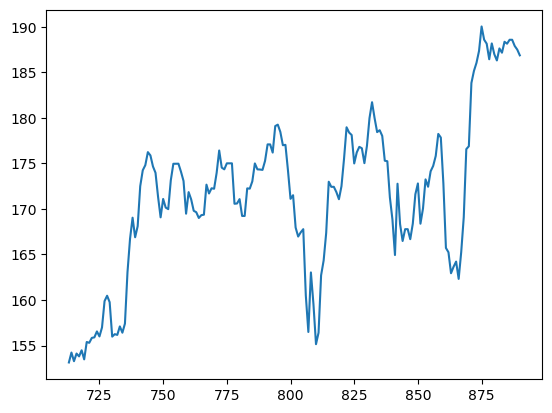

In [17]:
data_stock[-178:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

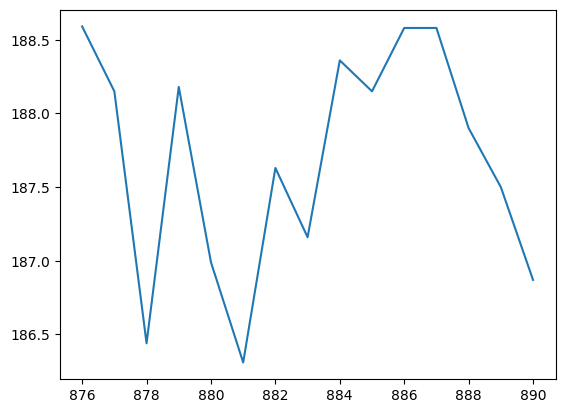

In [18]:
data_stock[-15:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

# Utility function

In [19]:
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from tensorflow.keras import layers

# converting the series data to supervised data
def series_data_to_supervised_data(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# finding difference between rows
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# inverting the difference value
def inverse_the_difference(history_data, yhat, interval=1):

  return (yhat+history_data[-interval])

# scaling the difference
def scale(train, test):
	# scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse the scaling
def invert_scale(scaler, X, value):
	temp = [x for x in X] + [value]
	array = numpy.array(temp)
	array = array.reshape(1, len(array))
	data_inverted = scaler.inverse_transform(array)
	return data_inverted[0, -1]

# LSTM model
def fit_lstm(train, batchSize, epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))

	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(epoch):
		model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False)
		model.reset_states()
	return model


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_rnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])


  #RNN model

  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  model = Sequential()
  model.add(layers.SimpleRNN(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')


  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


# make a one-step forecast
def forecast_rnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_cnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  #CNN model
  model = Sequential()
  model.add(layers.Conv1D(neurons,1, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

   #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_cnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]



def fit_bilstm(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()


  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  # Bi LSTM Model
  model = Sequential()
  model.add(Bidirectional(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_bilstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


# LSTM

In [20]:
data_stock.shape

(891,)

In [21]:
0.20 * 891

178.20000000000002

1/1 [==============================] - 0s 30ms/step

 Test RMSE: 2.357


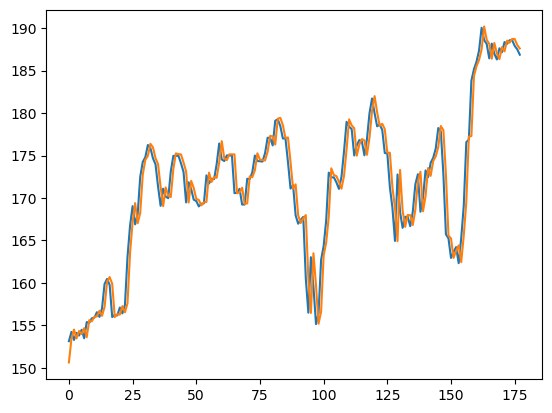

In [22]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

1/1 [==============================] - 0s 28ms/step

 Test RMSE: 1.060


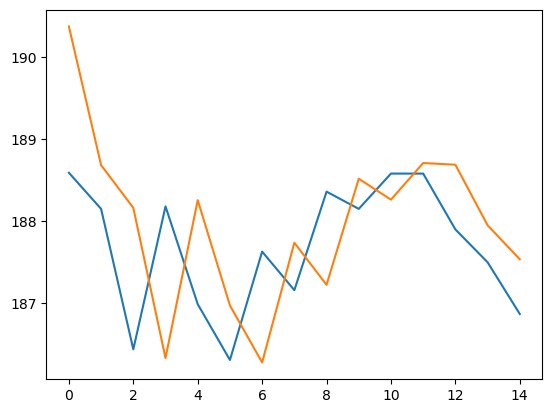

In [23]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# RNN

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 31ms/step
Month=1, Predicted=150.231583, Expected=153.140000
1/1 [==============================] - 0s 27ms/step
Month=2, Predicted=154.060836, Expected=154.230000
1/1 [==============================] - 0s 29ms/step
Month=3, Predicted=154.681101, Expected=153.280000
1/1 [==============================] - 0s 33ms/step
Month=4, Predicted=153.083855, Expected=154.120000
1/1 [==============================] - 0s 28ms/step
Month=5, Predicted=154.491764, Expected=153.810000
1/1 [==============================] - 0s 29ms/step
Month=6, Predicted=153.816160, Expected=154.480000
1/1 [==============================] - 0s 31ms/step
Month=7, Predicted=154.797737, Expected=153.480000
1/1 [==============================] - 0s 28ms/step
Month=8, Predicted=153.268128, Expected=155.390000
1/1 [==============================] - 0s 29ms/step
Month=9, Predicted=156.099623, Expected=155.300000
1/1 [==============================] - 0s 

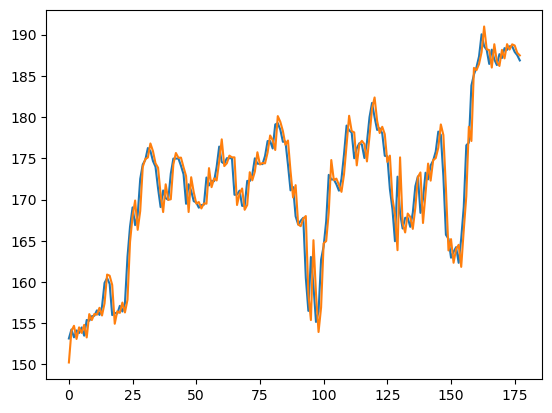

In [24]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 31ms/step
Month=1, Predicted=190.467106, Expected=188.590000
1/1 [==============================] - 0s 28ms/step
Month=2, Predicted=188.507324, Expected=188.150000
1/1 [==============================] - 0s 30ms/step
Month=3, Predicted=188.189985, Expected=186.440000
1/1 [==============================] - 0s 34ms/step
Month=4, Predicted=186.327140, Expected=188.180000
1/1 [==============================] - 0s 30ms/step
Month=5, Predicted=188.494661, Expected=186.990000
1/1 [==============================] - 0s 29ms/step
Month=6, Predicted=186.938151, Expected=186.310000
1/1 [==============================] - 0s 35ms/step
Month=7, Predicted=186.320201, Expected=187.630000
1/1 [==============================] - 0s 30ms/step
Month=8, Predicted=187.892436, Expected=187.160000
1/1 [==============================] - 0s 38ms/step
Month=9, Predicted=187.196245, Expected=188.360000
1/1 [==============================] - 0s 

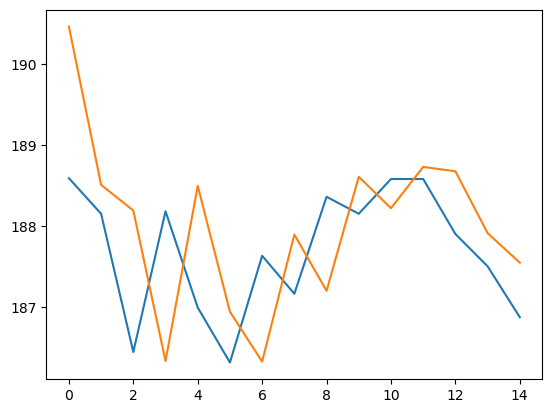

In [25]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# CNN Model


X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 28ms/step
Month=1, Predicted=152.196969, Expected=153.140000
1/1 [==============================] - 0s 29ms/step
Month=2, Predicted=150.807807, Expected=154.230000
1/1 [==============================] - 0s 28ms/step
Month=3, Predicted=153.416571, Expected=153.280000
1/1 [==============================] - 0s 29ms/step
Month=4, Predicted=154.532090, Expected=154.120000
1/1 [==============================] - 0s 34ms/step
Month=5, Predicted=153.559698, Expected=153.810000
1/1 [==============================] - 0s 31ms/step
Month=6, Predicted=154.414084, Expected=154.480000
1/1 [==============================] - 0s 31ms/step
Month=7, Predicted=154.091825, Expected=153.480000
1/1 [==============================] - 0s 30ms/step
Month=8, Predicted=154.782715, Expected=155.390000
1/1 [==============================] - 0s 33ms/step
Month=9, Predicted=153.746313, Expected=155.300000
1/1 [==============================] - 0s 

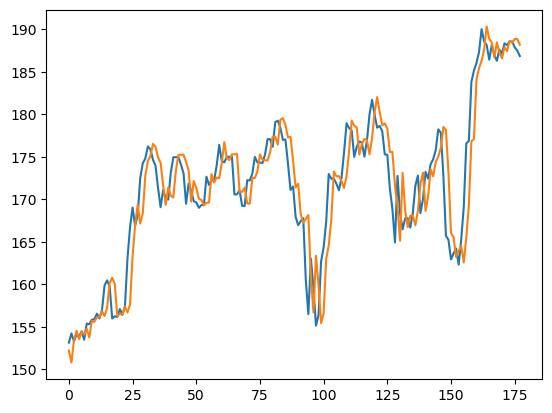

In [26]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 27ms/step
Month=1, Predicted=192.123654, Expected=188.590000
1/1 [==============================] - 0s 30ms/step
Month=2, Predicted=187.549468, Expected=188.150000
1/1 [==============================] - 0s 28ms/step
Month=3, Predicted=187.873494, Expected=186.440000
1/1 [==============================] - 0s 30ms/step
Month=4, Predicted=185.202788, Expected=188.180000
1/1 [==============================] - 0s 29ms/step
Month=5, Predicted=189.552580, Expected=186.990000
1/1 [==============================] - 0s 27ms/step
Month=6, Predicted=186.146148, Expected=186.310000
1/1 [==============================] - 0s 34ms/step
Month=7, Predicted=185.851943, Expected=187.630000
1/1 [==============================] - 0s 30ms/step
Month=8, Predicted=188.684866, Expected=187.160000
1/1 [==============================] - 0s 32ms/step
Month=9, Predicted=186.860800, Expected=188.360000
1/1 [==============================] - 0s 

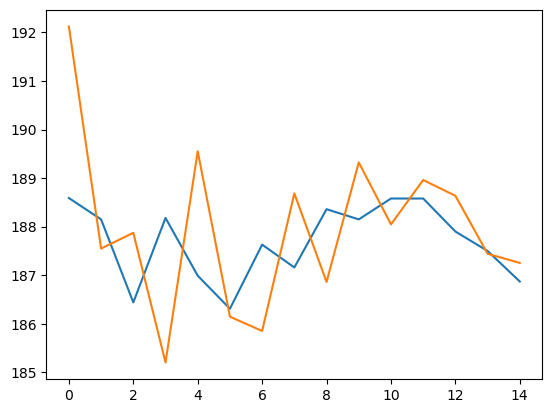

In [27]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# Bi-directional LSTM


X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 28ms/step
Month=1, Predicted=150.769122, Expected=153.140000
1/1 [==============================] - 0s 28ms/step
Month=2, Predicted=153.306296, Expected=154.230000
1/1 [==============================] - 0s 30ms/step
Month=3, Predicted=154.377105, Expected=153.280000
1/1 [==============================] - 0s 29ms/step
Month=4, Predicted=153.440739, Expected=154.120000
1/1 [==============================] - 0s 29ms/step
Month=5, Predicted=154.266670, Expected=153.810000
1/1 [==============================] - 0s 30ms/step
Month=6, Predicted=153.962928, Expected=154.480000
1/1 [==============================] - 0s 31ms/step
Month=7, Predicted=154.623457, Expected=153.480000
1/1 [==============================] - 0s 28ms/step
Month=8, Predicted=153.639513, Expected=155.390000
1/1 [==============================] - 0s 31ms/step
Month=9, Predicted=155.517807, Expected=155.300000
1/1 [==============================] - 0s 

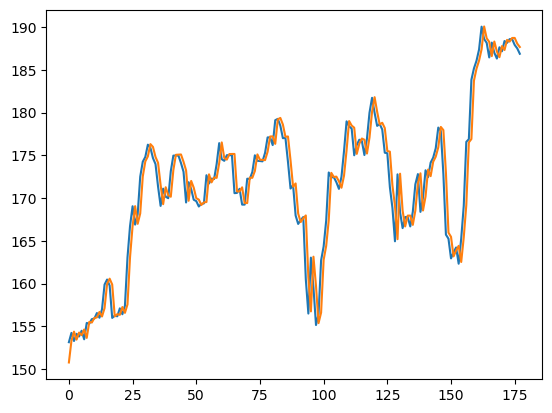

In [28]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 32ms/step
Month=1, Predicted=187.158174, Expected=186.310000
1/1 [==============================] - 0s 29ms/step
Month=2, Predicted=186.478660, Expected=187.630000
1/1 [==============================] - 0s 33ms/step
Month=3, Predicted=187.801028, Expected=187.160000
1/1 [==============================] - 0s 33ms/step
Month=4, Predicted=187.330172, Expected=188.360000
1/1 [==============================] - 0s 29ms/step
Month=5, Predicted=188.532136, Expected=188.150000
1/1 [==============================] - 0s 29ms/step
Month=6, Predicted=188.321915, Expected=188.580000
1/1 [==============================] - 0s 38ms/step
Month=7, Predicted=188.753336, Expected=188.580000
1/1 [==============================] - 0s 28ms/step
Month=8, Predicted=188.753509, Expected=187.900000
1/1 [==============================] - 0s 29ms/step
Month=9, Predicted=188.072055, Expected=187.500000
1/1 [==============================] - 0s 

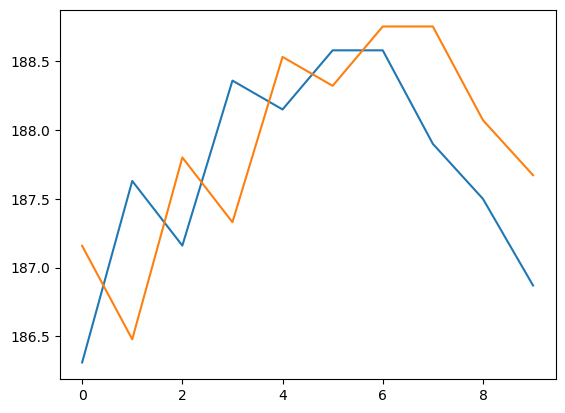

In [29]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-10], supervised_values[-10:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()

# Arima Model

In [30]:
pip install statsmodels

In [31]:
import numpy as np
data_stock_np = np.array(data_stock)

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot

#data = data[['Date']]
data = np.asarray(data_stock_np)



C:\Users\jaypa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  891
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1798.906
Date:                Fri, 15 Dec 2023   AIC                           3619.812
Time:                        11:49:12   BIC                           3672.515
Sample:                             0   HQIC                          3639.955
                                - 891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3001      0.683     -1.903      0.057      -2.639       0.039
ar.L2         -0.8280      1.516     -0.546      0.585      -3.800       2.144
ar.L3          0.5055      1.932      0.262      0.7

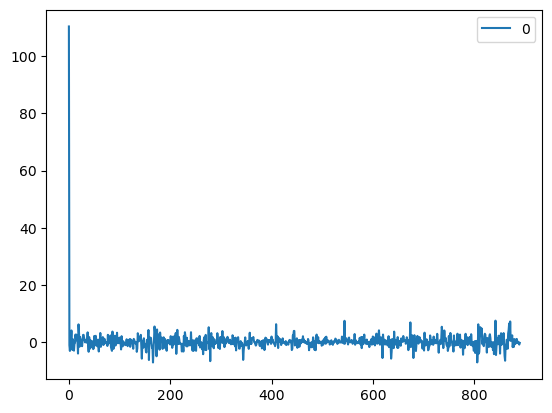

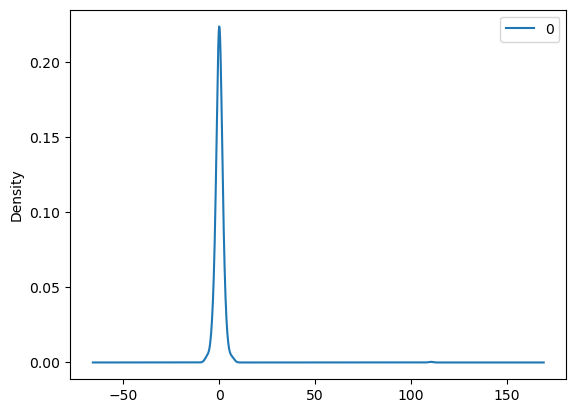

                0
count  891.000000
mean     0.205665
std      4.121053
min     -7.087373
25%     -0.734104
50%      0.052547
75%      0.965916
max    110.380000


In [33]:
model = ARIMA(data, order=(5,1,5))

model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=143.608176, expected=144.770000
predicted=144.784362, expected=144.020000
predicted=143.977548, expected=143.660000
predicted=143.644291, expected=143.340000
predicted=143.377365, expected=143.170000
predicted=143.160002, expected=141.630000
predicted=141.657881, expected=141.800000
predicted=141.878979, expected=141.050000
predicted=141.114360, expected=141.050000
predicted=141.078864, expected=141.830000
predicted=141.928846, expected=141.200000
predicted=141.160754, expected=140.680000
predicted=140.688279, expected=142.440000
predicted=142.505570, expected=142.270000
predicted=142.200036, expected=143.640000
predicted=143.610734, expected=144.530000
predicted=144.512529, expected=143.680000
predicted=143.517691, expected=143.790000
predicted=143.783120, expected=143.650000
predicted=143.626870, expected=146.580000
predicted=146.588935, expected=147.510000
predicted=147.453348, expected=147.060000
predicted=146.890607, expected=146.530000
predicted=146.490825, expected=148

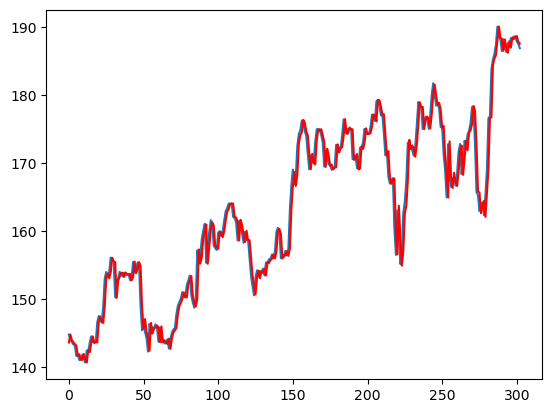

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

predicted=190.044783, expected=188.590000
predicted=188.250956, expected=188.150000
predicted=188.039589, expected=186.440000
predicted=186.285071, expected=188.180000
predicted=187.965689, expected=186.990000
predicted=186.603641, expected=186.310000
predicted=185.976972, expected=187.630000
predicted=187.693149, expected=187.160000
predicted=186.828252, expected=188.360000
predicted=188.257974, expected=188.150000
predicted=188.076107, expected=188.580000
predicted=188.450625, expected=188.580000
predicted=188.540922, expected=187.900000
predicted=187.723895, expected=187.500000
predicted=187.417436, expected=186.870000
Test RMSE: 1.024


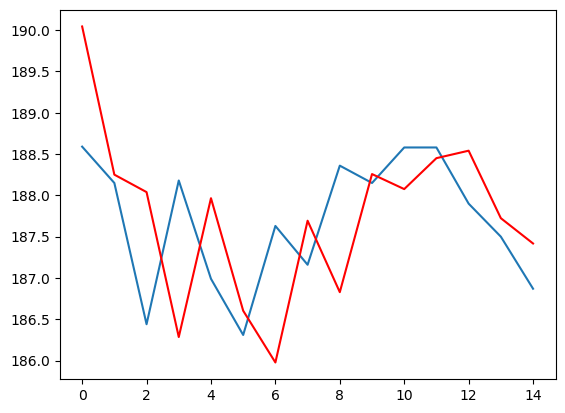

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = 876
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

# Make results for comparision

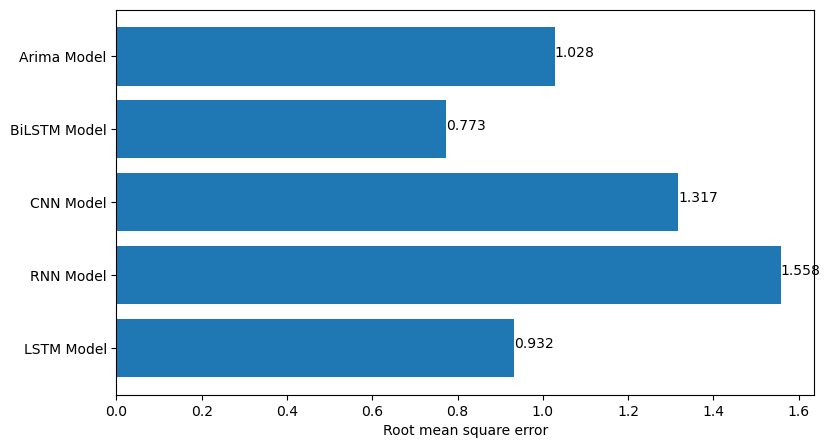

In [36]:
plt.figure(figsize=(9, 5))

# models
Models_used = ["LSTM Model", "RNN Model", "CNN Model","BiLSTM Model","Arima Model"]

# metrics of the model in list format
rmse_of_models = [0.932,1.558, 1.317 ,0.773,1.028]

plt.barh(Models_used, rmse_of_models)
plt.xlabel("Root mean square error")
for index, value in enumerate(rmse_of_models):
    plt.text(value, index,
             str(value))

plt.show()

# **Further Implementation**

## Gated Recurrent Unit (GRU) Neural Network

 -  **In addition to the models discussed in the original research paper, we implemented the Gated Recurrent Unit (GRU) model as part of this project.**
 - **The GRU model is known for its efficiency and accuracy in handling sequential data, making it a suitable candidate for time series forecasting.**

In [37]:
from tensorflow.keras.layers import GRU

In [38]:
def fit_gru(train, batchSize, epoch):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(GRU(units=64, activation='tanh', batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
	model.add(Dense(1))
	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(epoch):
		model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False)
		model.reset_states()
	return model

In [39]:
def forecast_gru(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

1/1 [==============================] - 0s 30ms/step

 Test RMSE: 2.370


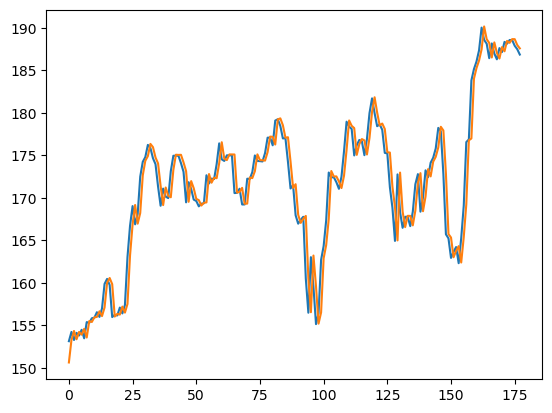

In [40]:
# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
gru_model = fit_gru(train_scaled, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
gru_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_gru(gru_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

1/1 [==============================] - 0s 27ms/step

 Test RMSE: 1.090


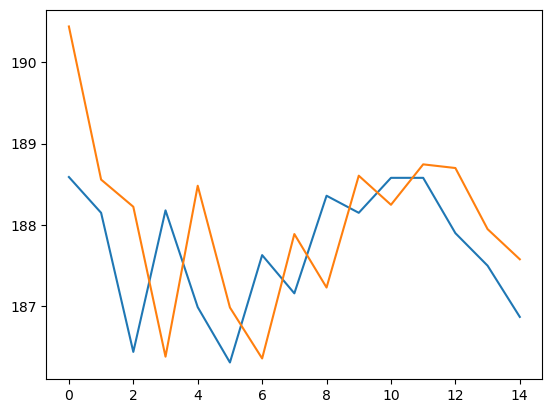

In [41]:
# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
gru_model = fit_gru(train_scaled, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
gru_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_gru(gru_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# **Model Comparison**

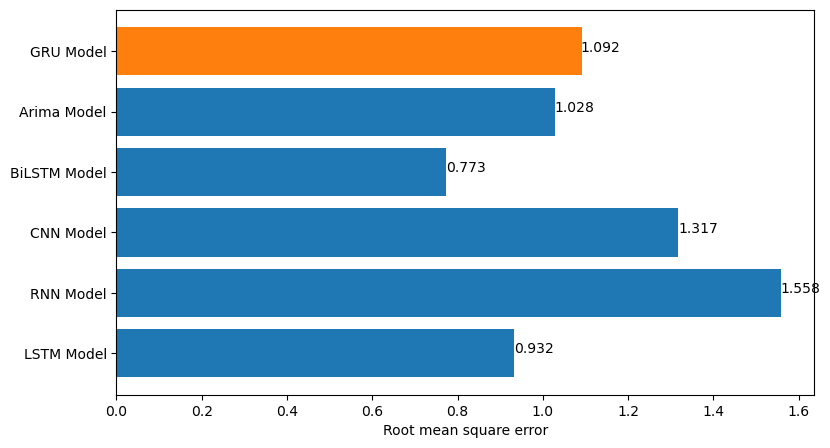

In [42]:
from matplotlib import pyplot
pyplot.figure(figsize=(9, 5))

# models
Models_used = ["LSTM Model", "RNN Model", "CNN Model","BiLSTM Model","Arima Model"]

# metrics of the model in list format
rmse_of_models = [0.932,1.558, 1.317 ,0.773,1.028]
pyplot.barh(Models_used, rmse_of_models)
pyplot.barh("GRU Model", 1.092)
pyplot.xlabel("Root mean square error")
for index, value in enumerate(rmse_of_models):
    pyplot.text(value, index,
             str(value))
pyplot.text(1.088, 5, str(1.092))

pyplot.show()

# Extra Implementation: GRU Model

- The bar graph compares the performance of the GRU model with the other models used in this project:

- From the graph, it is evident that the GRU model performed competitively. This additional work has not only validated the robustness of the GRU model but also contributed to a more comprehensive understanding of the application of various neural network models in financial time series forecasting.


## **Conclusion**

The project “Financial-Data-Time-Series-Forecasting-Using-Neural-Networks” likely aimed to leverage this capability of neural networks. By training these networks on historical financial data, the project sought to create a model that could accurately predict future financial trends. Such a model would be of immense value to various stakeholders in the financial sector, including investors, financial institutions, and policy makers.

However, it’s important to note that while neural networks can offer improved prediction accuracy, they are not without their challenges. These models require careful tuning and validation to ensure robust performance. Furthermore, they can act as “black boxes”, making it difficult to interpret their predictions and understand the underlying relationships in the data.

While the use of neural networks in financial forecasting presents exciting opportunities, it also requires careful consideration of the associated challenges. As with any machine learning approach, the key to success lies in understanding the strengths and limitations of the chosen model, and in carefully preparing and processing the input data. It’s also crucial to validate the model’s performance using appropriate metrics and test data. With these considerations in mind, projects like “Financial-Data-Time-Series-Forecasting-Using-Neural-Networks” have the potential to significantly advance the field of financial forecasting.

**In conclusion, the additional implementation of the GRU model** in this project has significantly enriched the research. The GRU model, not originally included in the previous research paper, was introduced as an enhancement to the existing models. The comparative analysis, as depicted in the bar graph, indicates that the GRU model performed competitively, further validating its effectiveness in forecasting financial data time series. This additional work has not only validated the robustness of the GRU model but also contributed to a more comprehensive understanding of the application of various neural network models in financial time series forecasting. Future work may explore further improvements and optimizations to the GRU model for even better performance.

# References:

[1]: R. Khandelwal, P. Marfatia, S. Shah, V. Joshi, P. Kamath and K. Chavan, "Financial Data Time Series Forecasting Using Neural Networks and a Comparative Study," 2022 International Conference for Advancement in Technology (ICONAT), Goa, India, 2022, pp. 1-6, doi: 10.1109/ICONAT53423.2022.9725845.

[2]: R. Khandelwal (2022, January 28). Financial-Data-Time-Series-Forecasting-Using-Neural-Networks. https://github.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks